In [1]:
import os
import geopandas
import sys
sys.path.append('/Users/samrelins/Documents/LIDA/dental_project/src/')
from data_prep import *
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'geopandas'

In [2]:
# load mouth shapefile to geo dataframe
teeth_gdf = geopandas.read_file("mouth_map.shp")

# load ga data and convert to tooth level
data_dir = '/Users/samrelins/Documents/LIDA/dental_project/data/erin_data/'
ga_data, _ = build_epi_ga_data(data_dir=data_dir)
tooth_data = ga_data.pipe(generate_tooth_level_data)

# merge tooth level data with gdf
teeth_gdf = (teeth_gdf
             .merge(tooth_data, on="tooth", how="left")
             .fillna(0))

In [3]:
def plot_mouth_map(feature, cmap, title):
    ax = teeth_gdf.plot(feature,
                        legend=True,
                        figsize=(30, 20),
                        cmap=cmap)
    teeth_gdf.boundary.plot(ax=ax, color="black")
    ax.axis("off")
    plt.title(f"GA Data: {title}", fontsize=25);
    plt.annotate("Adult Teeth",
                 (0.18, 0.105),
                 fontsize=15,
                 fontweight="bold")
    plt.annotate("Primary Teeth",
                 (0.65, 0.26),
                 fontsize=15,
                 fontweight="bold")

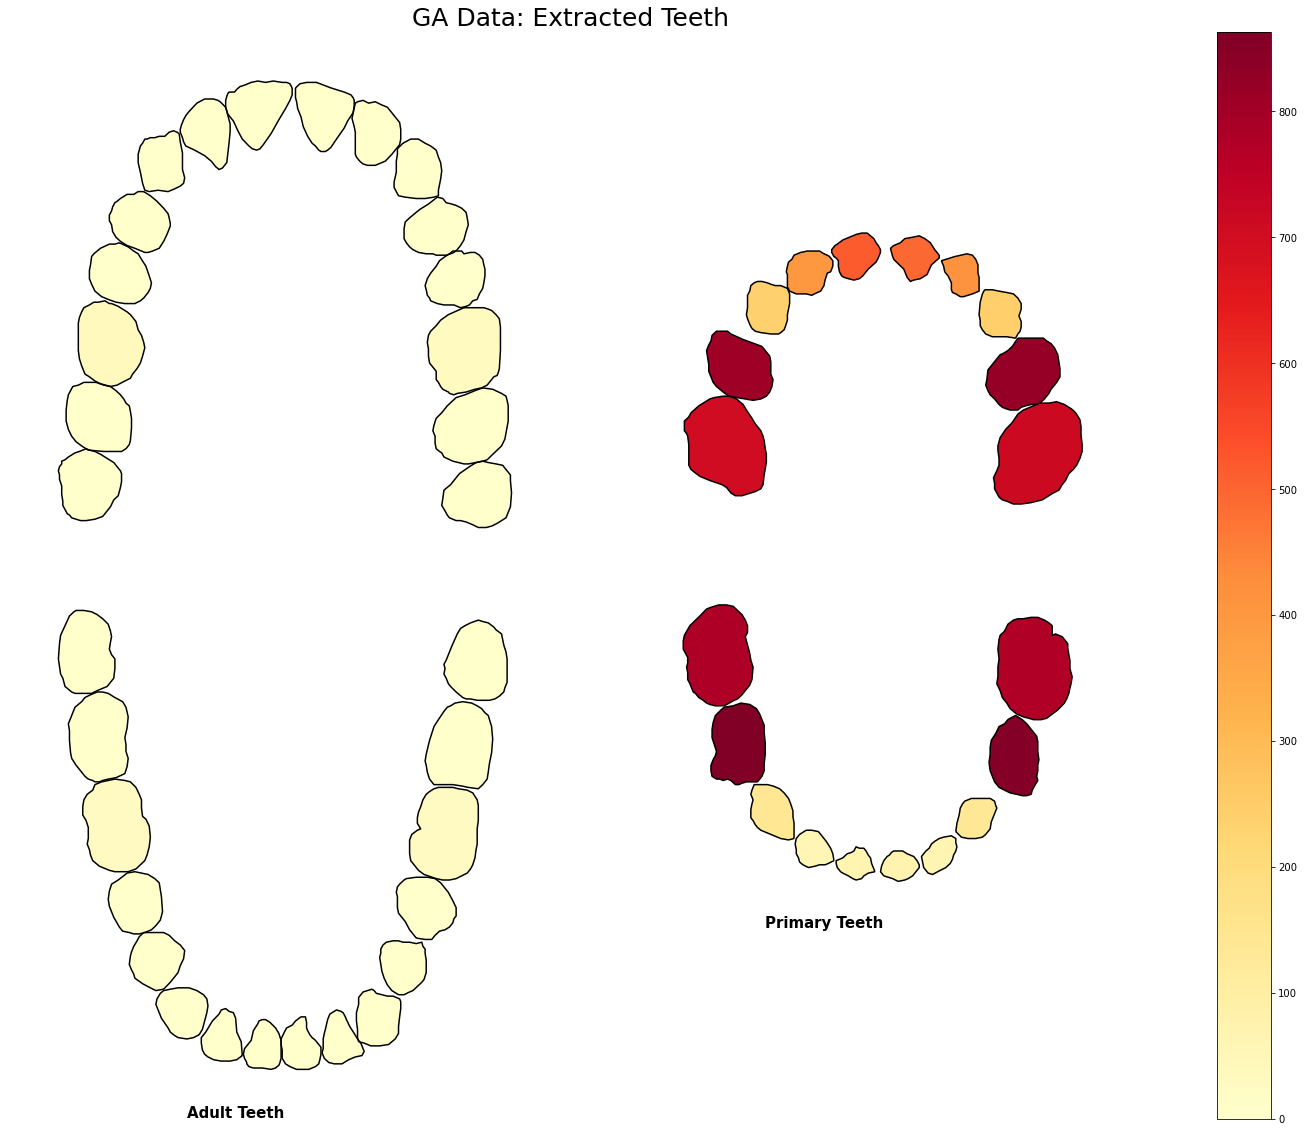

In [4]:
plot_mouth_map("n_extracted",
               cmap="YlOrRd",
               title="Extracted Teeth")

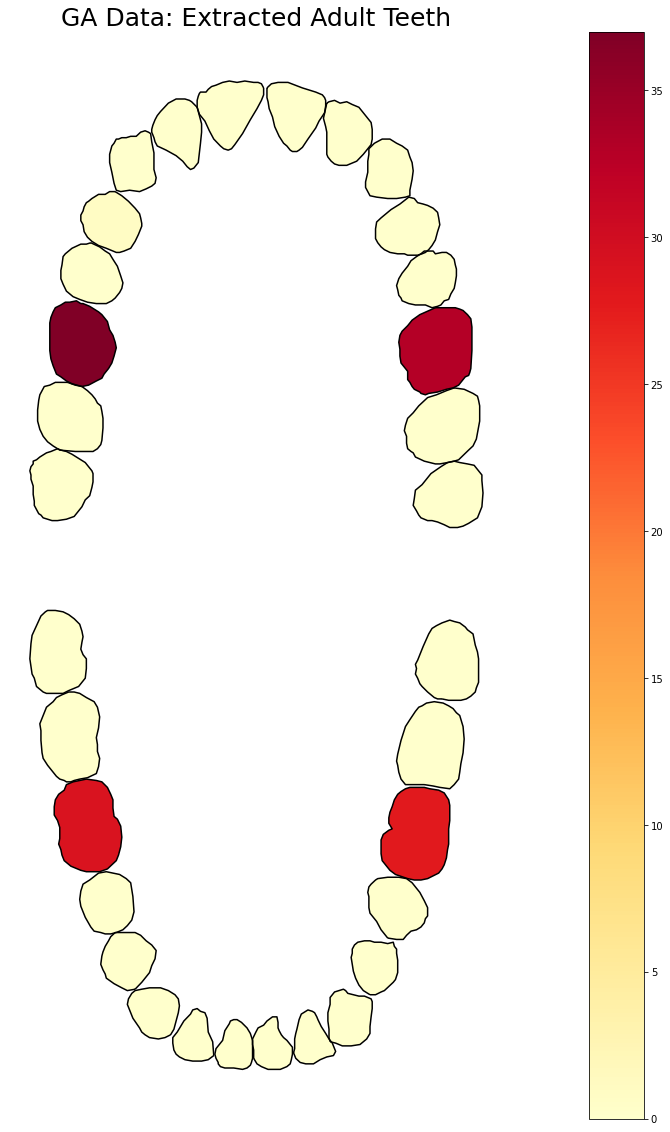

In [10]:
adult = ~teeth_gdf.primary.astype("bool")
ax = teeth_gdf[adult].plot("n_extracted",
                             legend=True,
                             figsize=(30, 20),
                             cmap="YlOrRd")
teeth_gdf[adult].boundary.plot(ax=ax, color="black")
ax.axis("off")
plt.title("GA Data: Extracted Adult Teeth", fontsize=25);

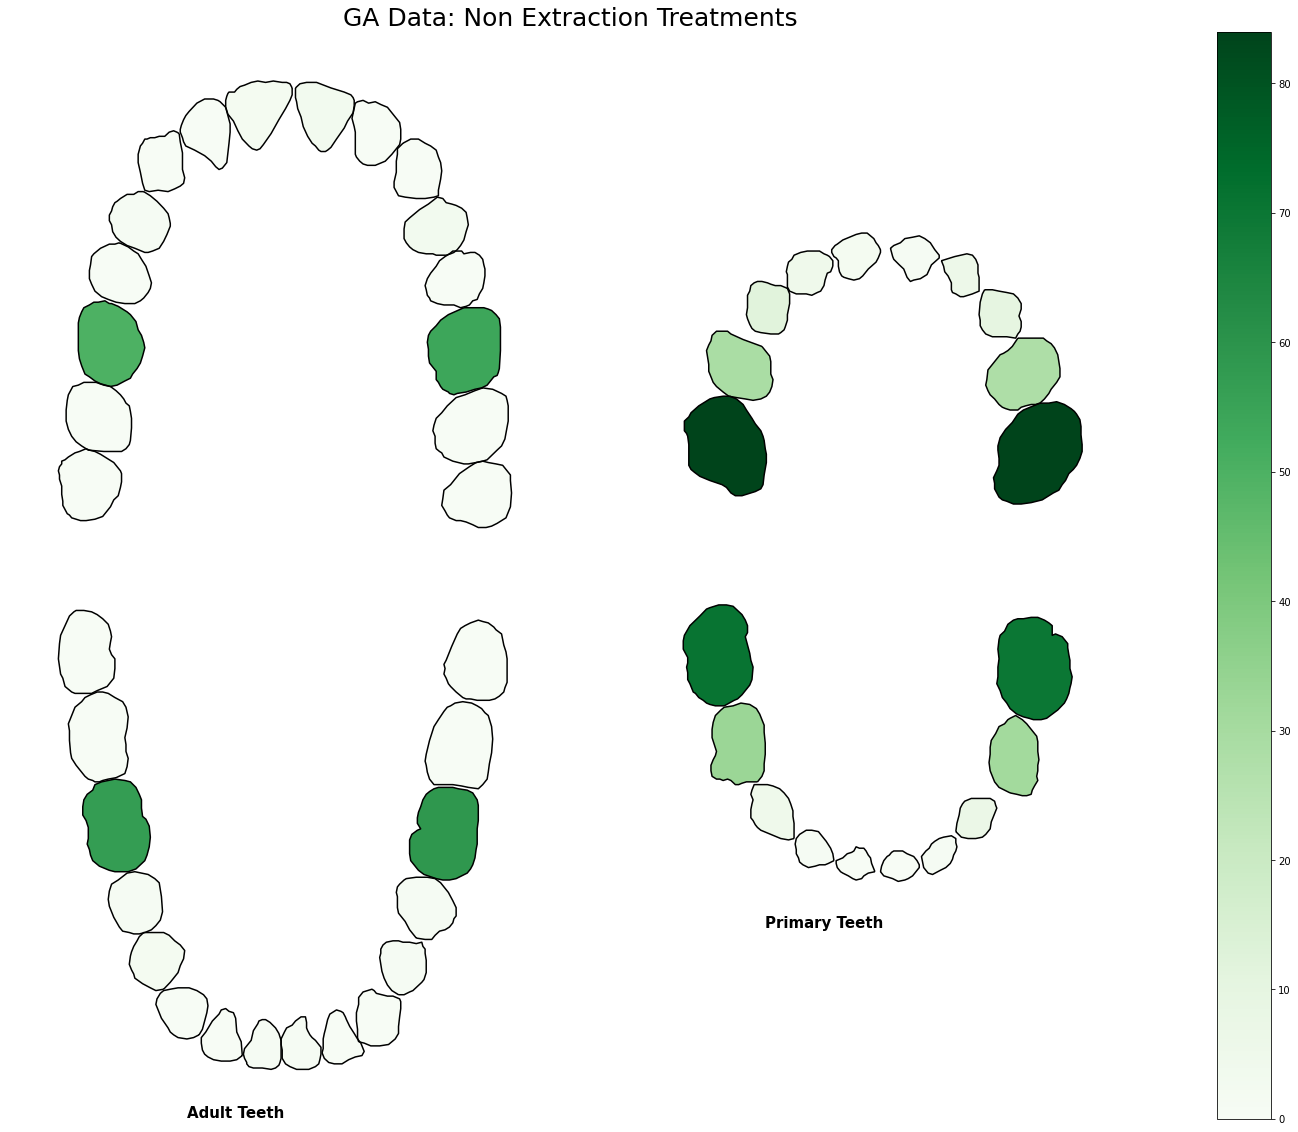

In [6]:
plot_mouth_map("n_non_extractions",
               cmap="Greens",
               title="Non Extraction Treatments")

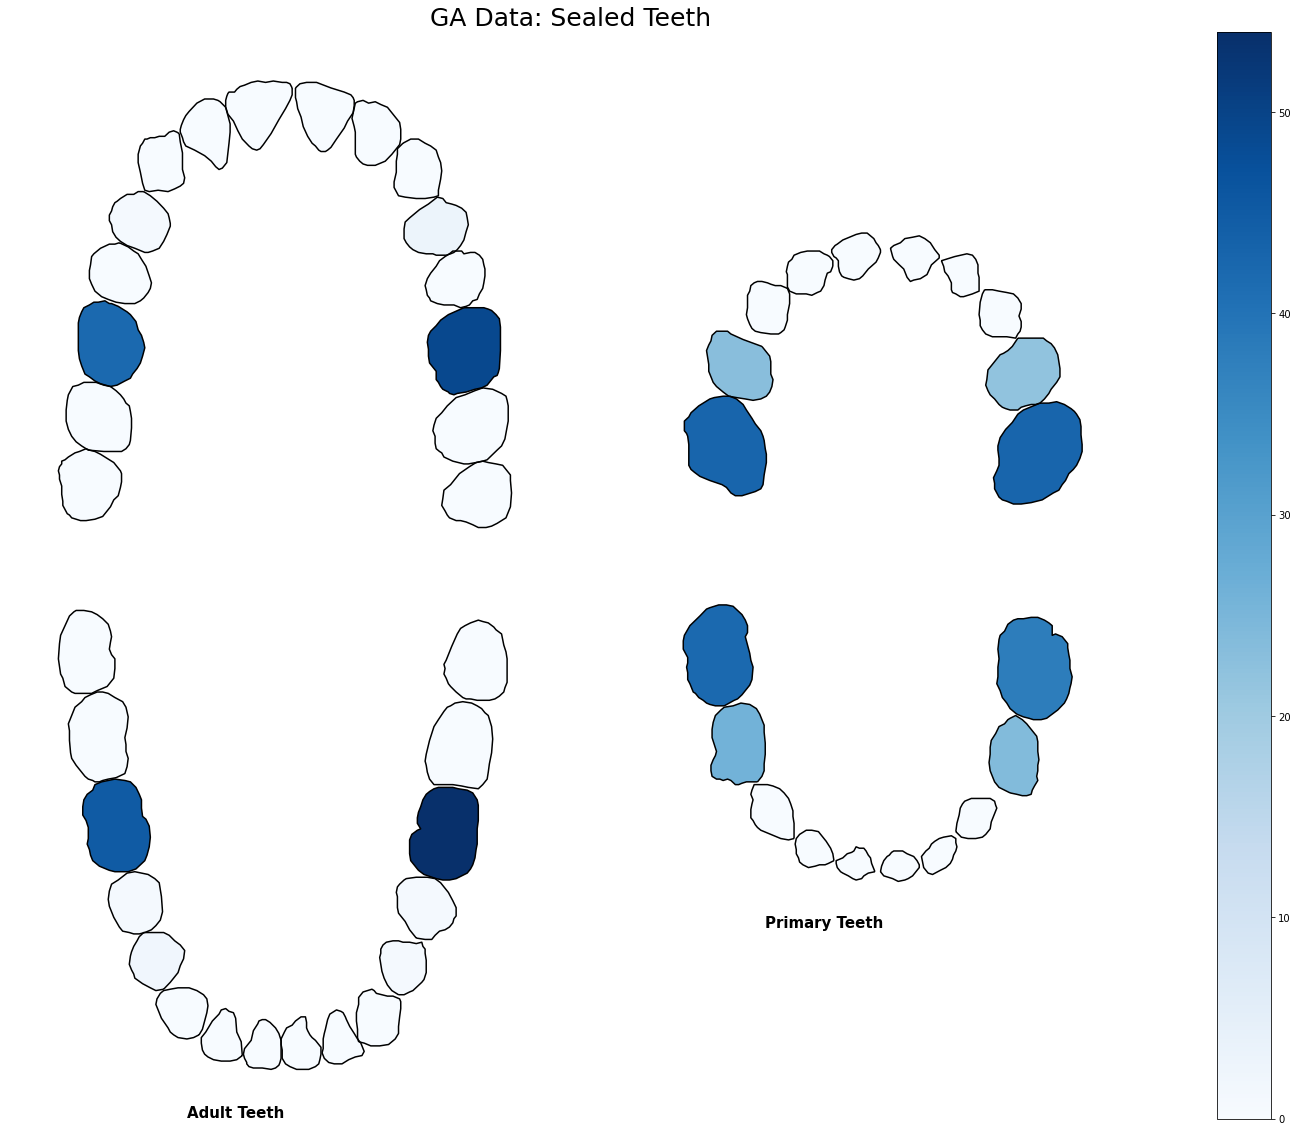

In [7]:
plot_mouth_map("n_sealed",
               cmap="Blues",
               title="Sealed Teeth")

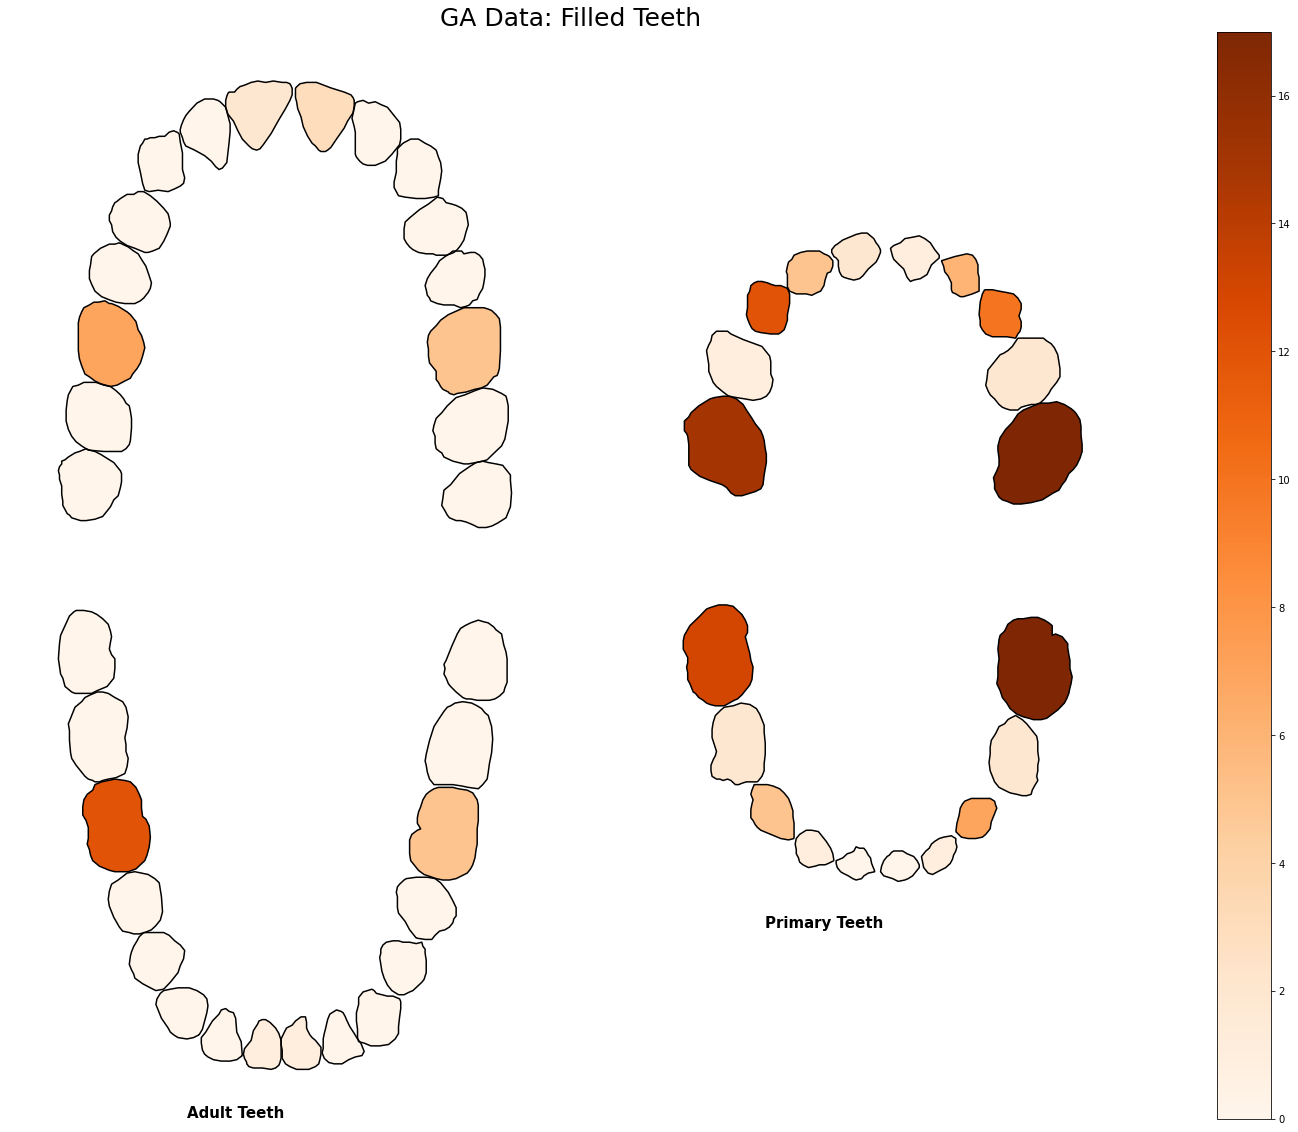

In [8]:
plot_mouth_map("n_filled",
               cmap="Oranges",
               title="Filled Teeth")

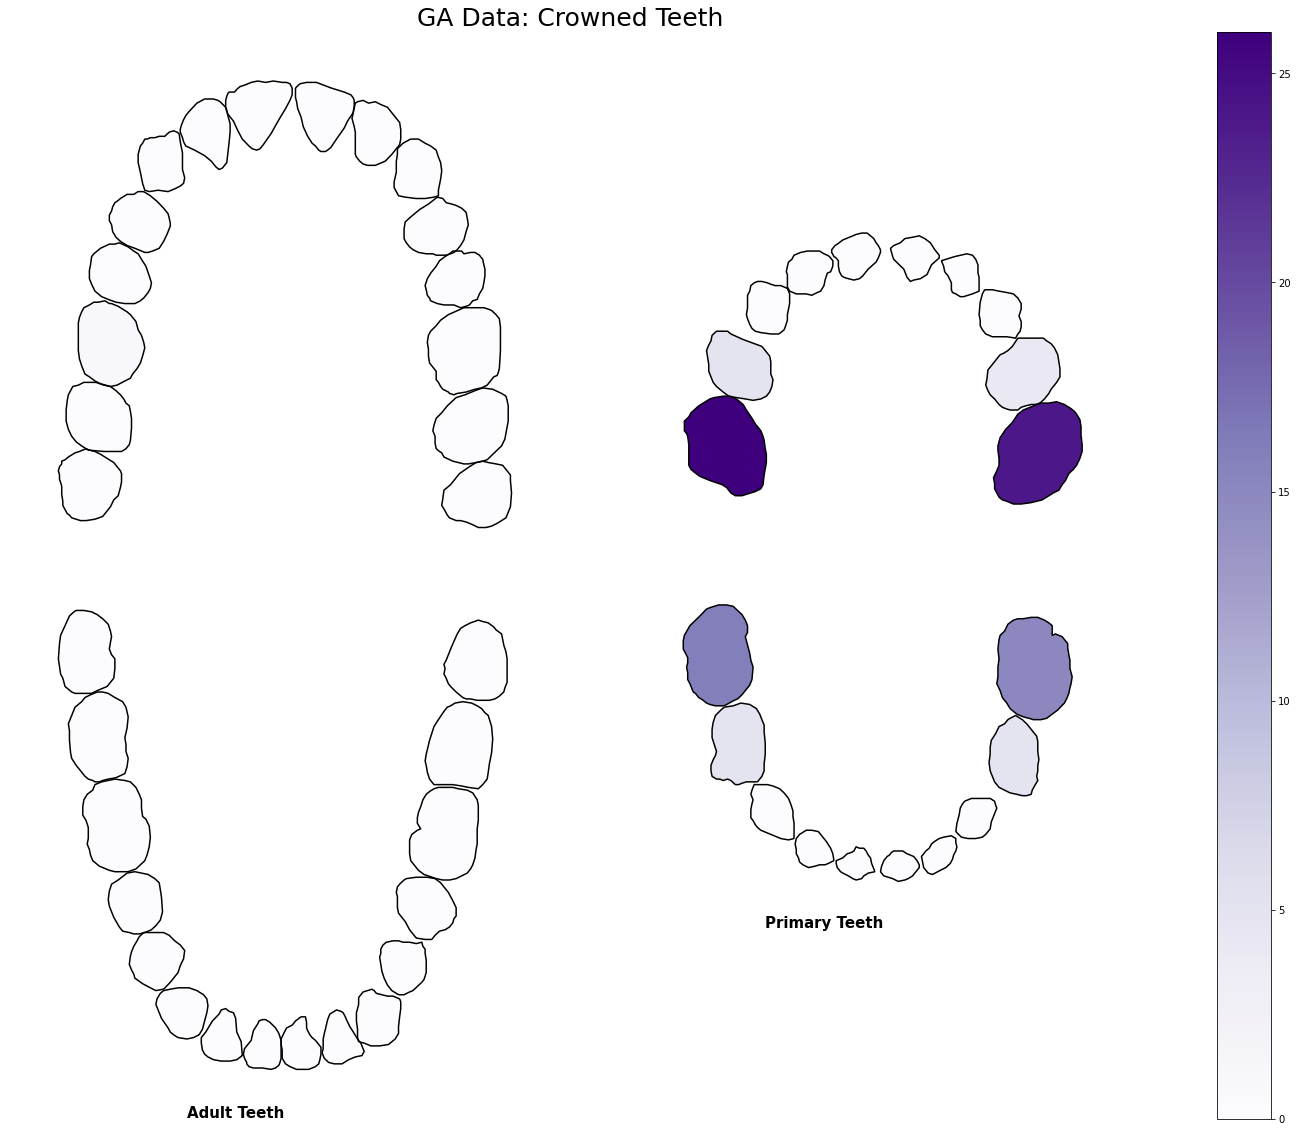

In [9]:
plot_mouth_map("n_crowned",
               cmap="Purples",
               title="Crowned Teeth")
